In [6]:
import pandas as pd
import numpy as np
test=pd.read_excel("Data_Test_rest.xlsx")
train=pd.read_excel("Data_Train_rest.xlsx")

In [7]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [8]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [9]:
train.dropna(inplace=True)

In [10]:
train=train.drop(columns=["TITLE"])


In [11]:
train=train.drop(columns=["RESTAURANT_ID"])


In [12]:
train.dtypes

CUISINES    object
TIME        object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
COST         int64
dtype: object

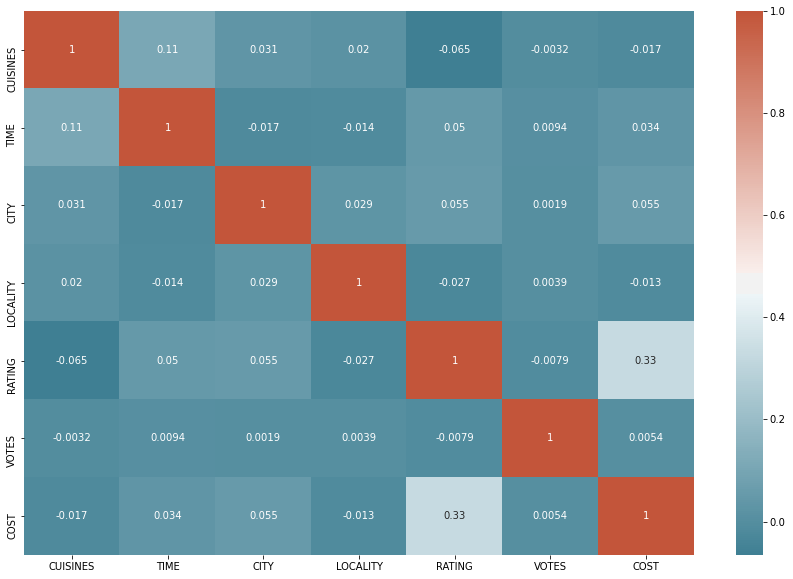

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt  
corr = train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
train

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in train.columns:
    if train[column_name].dtype == object:
        train[column_name] = le.fit_transform(train[column_name])
      

In [17]:
train.skew

<bound method DataFrame.skew of        CUISINES  TIME  CITY  LOCALITY  RATING  VOTES  COST
0          2463   700   300       267      16   1277  1200
1           275  1799    63       961      22    949  1500
2          2800   623    63      1015      18    711   800
3          3893   257   206       128      21    786   800
4          1663   581   206       573      18    469   300
...         ...   ...   ...       ...     ...    ...   ...
12685      2758  1093   125       318      18   1348   500
12686      2017  1125   206       125      23    191  1800
12687      1963  1086   223      1241      20   1427  1300
12688      3305  1754    63       584      15    995   400
12689      2770   794   125      1232      14   1504   600

[11393 rows x 7 columns]>

In [20]:
skew=('CITY','LOCALITY','RATING')
for col in skew:
    if train.skew().loc[col]>0.55:
        train[col]=np.log1p(train[col])

In [23]:
from scipy.stats import zscore
z_score=abs(zscore(train))
df_covid_final= train.loc[(z_score<3).all(axis=1)]
print(train.shape)

(11393, 7)


In [24]:
#saperate input and target variabke
import numpy as np
y=df_covid_final["COST"]
df_x=df_covid_final.drop(columns=["COST"])
print(df_x.shape)
print(y.shape)


(11114, 6)
(11114,)


In [25]:
#calculating r2 score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,Y_test=train_test_split(df_x,y,random_state=55,test_size=0.20)
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
from sklearn.decomposition import PCA
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,Y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(x_train,y_train)
        pre=i.predict(x_test)
        r2_sc=r2_score(Y_test,pre)
        print("max r2 score corrospond to random state",r_state,"is",r2_sc)
        if r2_sc>max_r_score:
            max_r_score=r2_sc
            final_r_state=r_state
            final_model=i
            print()
            print()
            print()
            print()
            print("max r2 score corrospond to random state",final_r_state,"is",max_r_score,"and model is",final_model)
 

max r2 score corrospond to random state 42 is -0.29229964786552864
max r2 score corrospond to random state 42 is 0.039333872567462236




max r2 score corrospond to random state 42 is 0.039333872567462236 and model is KNeighborsRegressor()
max r2 score corrospond to random state 42 is 0.10895862283040325




max r2 score corrospond to random state 42 is 0.10895862283040325 and model is AdaBoostRegressor()
max r2 score corrospond to random state 42 is 0.12805743615114207




max r2 score corrospond to random state 42 is 0.12805743615114207 and model is LinearRegression()
max r2 score corrospond to random state 42 is 0.4415011432638919




max r2 score corrospond to random state 42 is 0.4415011432638919 and model is GradientBoostingRegressor()
max r2 score corrospond to random state 43 is -0.13258532910440302
max r2 score corrospond to random state 43 is 0.06180849685183609
max r2 score corrospond to random state 43 is 0.04842840642134272
max r2 score corrospond to random state 43 is 0.1

max r2 score corrospond to random state 88 is 0.11755922553944287
max r2 score corrospond to random state 88 is 0.12003700595832645
max r2 score corrospond to random state 88 is 0.4350632518233062
max r2 score corrospond to random state 89 is -0.17661797702624416
max r2 score corrospond to random state 89 is 0.03824572089687284
max r2 score corrospond to random state 89 is 0.09279078183513556
max r2 score corrospond to random state 89 is 0.13520970027179346
max r2 score corrospond to random state 89 is 0.437734693638257
max r2 score corrospond to random state 90 is -0.24787287853106266
max r2 score corrospond to random state 90 is 0.04074407501347255
max r2 score corrospond to random state 90 is 0.13276016237078048
max r2 score corrospond to random state 90 is 0.12564947716740615
max r2 score corrospond to random state 90 is 0.45874679280545827
max r2 score corrospond to random state 91 is -0.17071399256990438
max r2 score corrospond to random state 91 is 0.01796532318973687
max r2 sco

In [26]:
x_train,x_test,y_train,Y_test=train_test_split(df_x,y,random_state=86,test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),df_x,y,cv=10,scoring="r2").mean()

0.12917417815945953

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is",r2_score(Y_test,y_pred))
print("RMSE is",np.sqrt(mean_squared_error(Y_test,y_pred)))

r2 score is 0.14929133312081788
RMSE is 420.1933179262728


In [ ]:
import joblib
joblib.dump(lreg,'rest.pkl)